## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [4]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [5]:
#Your code here
X = heart.drop('target',axis=1)
y = heart['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [23]:
# Your code here
def predict_y(X, w):
    return np.dot(X,w)
def sigmoid(x):
    x = np.array(x)
    return 1/(1+np.exp(-x))
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if not initial_weights:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    weights_data = weights
    for iteration in range(max_iterations):
        y_pred = sigmoid(predict_y(X,weights))
        error_vector = y_pred-y
        gradient = np.dot(X.transpose(),error_vector) 
        weights -= gradient*alpha 
        weights_data = np.vstack((weights_data,weights))
    weights_df = pd.DataFrame(weights_data)
    return weights, weights_df

weights,_ = grad_desc(X_train,y_train,10000,1e-3)

## Now use your algorithm to make [probability] predictions on the test set

In [26]:
#Your code here
y_hat = sigmoid(predict_y(X_test,weights))
y_hat

array([9.54351752e-01, 2.52820157e-02, 9.30088067e-02, 1.23341951e-01,
       9.54591096e-04, 9.96801519e-01, 2.60278512e-01, 9.38827997e-01,
       3.85080493e-03, 7.88512050e-01, 4.03885105e-02, 6.73949547e-01,
       5.26012357e-01, 2.34639665e-03, 9.90539658e-01, 5.80653149e-01,
       6.86626548e-01, 1.55404238e-02, 9.85888493e-01, 2.82143951e-02,
       9.77805962e-01, 9.80487575e-01, 3.09434117e-02, 7.71402100e-01,
       7.72321290e-01, 7.82979543e-01, 1.09659563e-03, 7.89440583e-02,
       2.07172105e-02, 1.22561810e-02, 7.30715425e-01, 1.56087838e-02,
       9.85788184e-01, 5.38645175e-02, 3.51201890e-01, 9.86998840e-01,
       8.40636113e-01, 3.00350655e-01, 7.77146505e-01, 9.92386419e-01,
       9.64315970e-01, 1.32130255e-01, 1.77151114e-03, 1.52337124e-02,
       9.61534580e-01, 9.09341690e-01, 9.74875506e-01, 7.33055861e-01,
       1.81809080e-02, 1.73341608e-03, 9.76435258e-01, 2.61972936e-03,
       3.28671523e-03, 6.74876503e-01, 8.53983798e-01, 5.98918335e-04,
      

## Create an ROC curve for your predictions

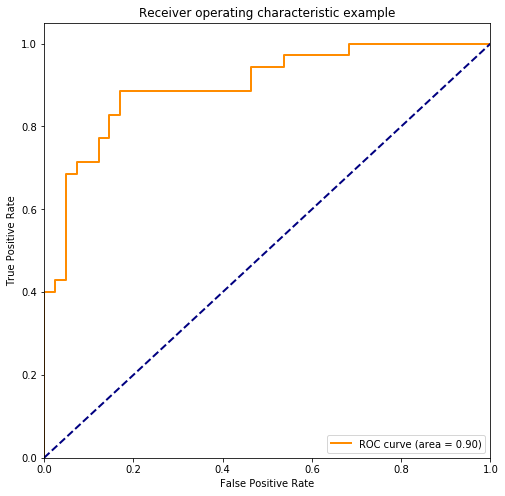

In [31]:
# Get metrics
from sklearn.metrics import roc_curve, auc
fpr,tpr,_ = roc_curve(y_test,y_hat)
r_auc = auc(fpr,tpr)
# Plot curve
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(r_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

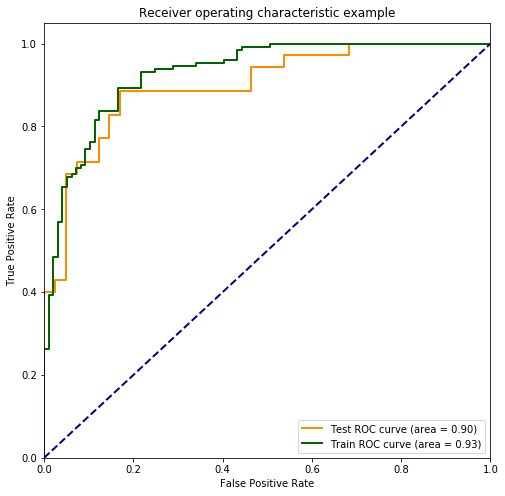

In [33]:
# Get metrics for train
y_hat_train = sigmoid(predict_y(X_train,weights))
fpr_t,tpr_t,_ = roc_curve(y_train,y_hat_train)
r_auc_t = auc(fpr_t,tpr_t)

# Plot stuff
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test ROC curve (area = {:0.2f})'.format(r_auc))
plt.plot(fpr_t, tpr_t, color='darkgreen',
         lw=lw, label='Train ROC curve (area = {:0.2f})'.format(r_auc_t))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [40]:
# Your code here
from sklearn.metrics import confusion_matrix
y_hat_bin = [0 if yi < 0.5 else 1 for yi in y_hat]
cm = confusion_matrix(y_test,y_hat_bin)

# Plot Confusion Matrix from SKLearn
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.7804878  0.2195122 ]
 [0.11428571 0.88571429]]


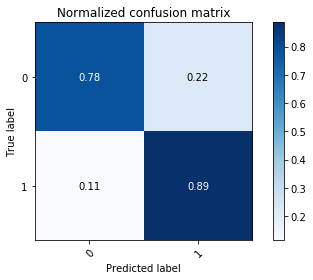

In [42]:
plot_confusion_matrix(y_test,y_hat_bin,['0','1']);

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [43]:
# Your code here
logit=LogisticRegression(random_state=17,solver='lbfgs',fit_intercept=False)
model = logit.fit(X,y)

## Create an ROC Curve for the sci-kit learn model

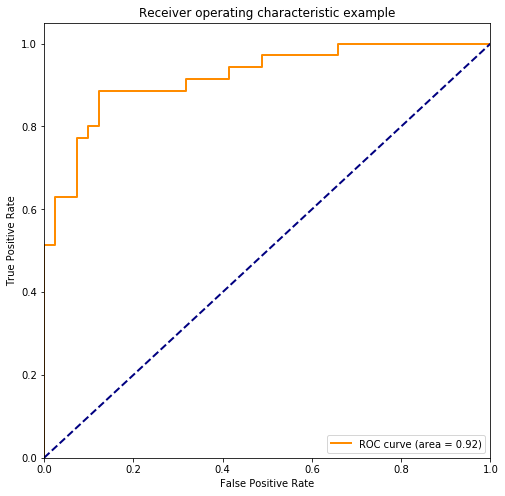

In [44]:
fpr,tpr,_ = roc_curve(y_test,model.predict_proba(X_test)[:,1])
r_auc = auc(fpr,tpr)
# Plot curve
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(r_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## As before add an ROC curve to the graph for the train set as well

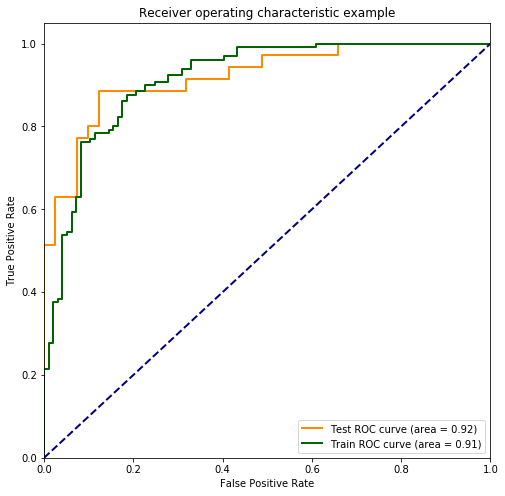

In [45]:
#Your code here
fpr_t,tpr_t,_ = roc_curve(y_train,model.predict_proba(X_train)[:,1])
r_auc_t = auc(fpr_t,tpr_t)

# Plot stuff
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test ROC curve (area = {:0.2f})'.format(r_auc))
plt.plot(fpr_t, tpr_t, color='darkgreen',
         lw=lw, label='Train ROC curve (area = {:0.2f})'.format(r_auc_t))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

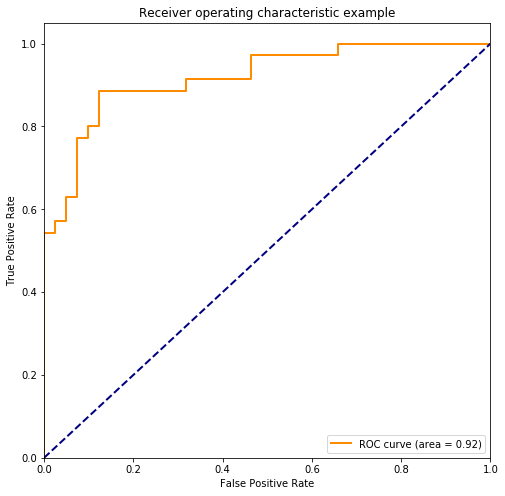

In [46]:
# Your code here
logit=LogisticRegression(random_state=17,solver='lbfgs',fit_intercept=True)
model = logit.fit(X,y)
fpr,tpr,_ = roc_curve(y_test,model.predict_proba(X_test)[:,1])
r_auc = auc(fpr,tpr)
# Plot curve
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(r_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

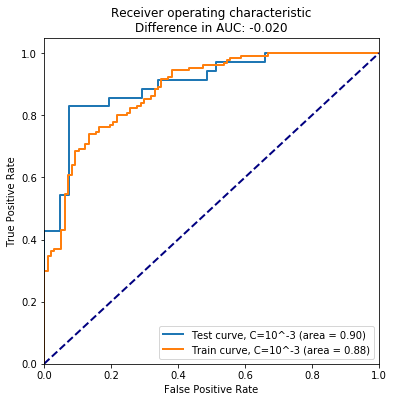

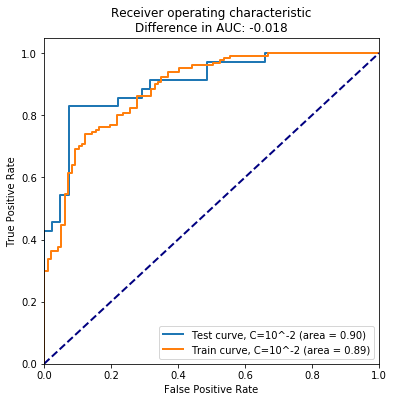

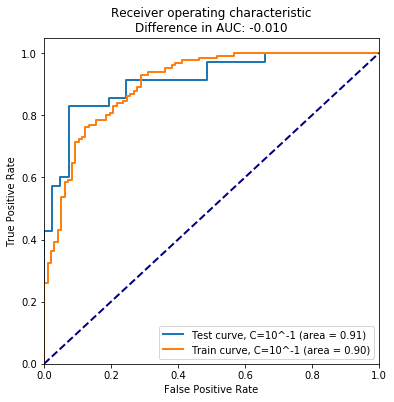

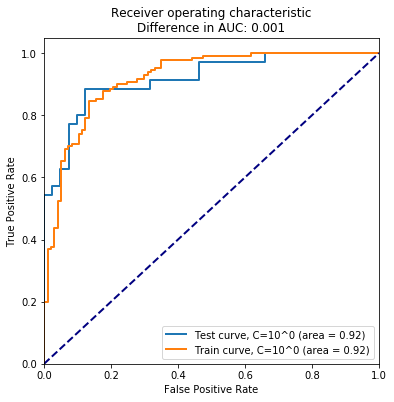

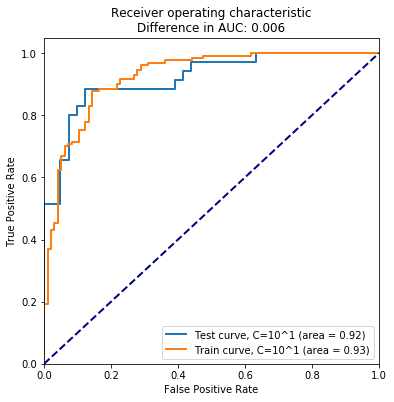

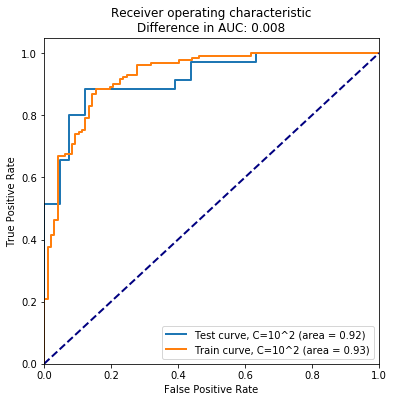

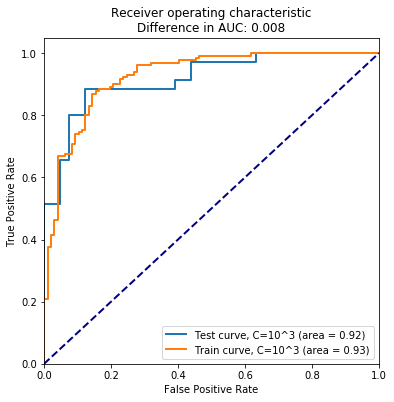

In [56]:
# Your code here
for C in range(-3,4):
    logit=LogisticRegression(random_state=17,solver='lbfgs',fit_intercept=True, C=1*10**C)
    model = logit.fit(X,y)
    fpr,tpr,_ = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    r_auc = auc(fpr,tpr)
    fpr_t,tpr_t,_ = roc_curve(y_train,model.predict_proba(X_train)[:,1])
    r_auc_t = auc(fpr_t,tpr_t)
    # Plot curve
    plt.figure(figsize=(6,6))
    lw = 2
    plt.plot(fpr, tpr,
             lw=lw, label='Test curve, C=10^{0} (area = {1:0.2f})'.format(C,r_auc))
    plt.plot(fpr_t, tpr_t,
             lw=lw, label='Train curve, C=10^{0} (area = {1:0.2f})'.format(C,r_auc_t))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic\nDifference in AUC: {:1.3f}'.format(r_auc_t-r_auc))
    plt.legend(loc="lower right")


## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

As the regularization parameter increase, the difference in AUC

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization. In the final lessons of this section we will investigate one last method for visualizing our models which can be a useful tool for presenting your model outputs to a non-technical audience.
